使用numpy的知识,对鱼图像的数据进行操作

# Pandas的数据结构


导入pandas
三剑客

1.Series

In [2]:
import matplotlib.pyplot as plt
# 使用魔法命令
%matplotlib inline

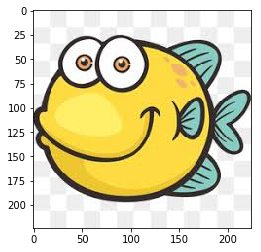

In [17]:
fish = plt.imread('fish.jpg')
plt.imshow(fish)

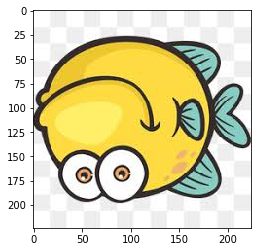

In [4]:
fish1 = fish[::-1]
plt.imshow(fish1)

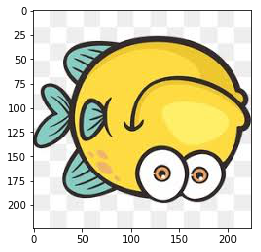

In [5]:
fish2 = fish[::-1,::-1]
plt.imshow(fish2)

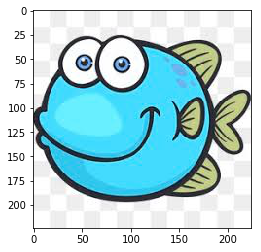

In [8]:
fish3 = fish[::,::,::-1]
plt.imshow(fish3)

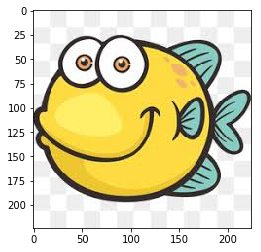

In [29]:

plt.imshow(fish)


# panda的数据结构
导入pandas
三剑客

In [31]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt


1.Series
series 是一种类似于一维数组的对象,由下面的两个部分组成  
 
- values:一组数据(ndarray类型)  

+ index:相关的数据索引标签

In [32]:
nd = np.array([1,4,5,2,3,7])
nd[2]

5

1) Series的创建  
两种创建方式  
(1)由列表或者numpy数组进行创建  

   * 默认索引为0到N-1的整数型索引


In [35]:
s = Series(nd)
s

0    1
1    4
2    5
3    2
4    3
5    7
dtype: int32

还可以通过设置index参数指定索引

In [37]:
s.index = list('abcdef')
s

a    1
b    4
c    5
d    2
e    3
f    7
dtype: int32

In [39]:
s = Series(nd,index = ['张三','李四','Po','Michael','Lisa','Alisa'])
s

张三         1
李四         4
Po         5
Michael    2
Lisa       3
Alisa      7
dtype: int32

In [41]:
# series 中存的数据必须是一维的
s = Series(np.random.randint(0,10,size = (5,2)),index = list('abcde'))

Exception: Data must be 1-dimensional

特别的,由ndarray创建的是引用,而不是副本.对series元素的改变也会改变原来的ndarray对象中的与元素.(而用列表创建就没有这种情况)

In [43]:
s2 = Series({'a':1,'b':2,'c':4,'d':10})
s2

a     1
b     2
c     4
d    10
dtype: int64

In [49]:
s1 = Series({'语文':150,'数学':150,'英语':150,'理综':300}) 
s1

数学    150
理综    300
英语    150
语文    150
dtype: int64

In [51]:
nd = np.array([150,150,150,300])
s2 = Series(nd,index=['语文','数学','英语','理综'])
s2

语文    150
数学    150
英语    150
理综    300
dtype: int32

由两个列表创建Series的优点是可以得到一个有序的结构
* 由Series通过字典创建的优势是快速创建一个无序的结构

In [1]:
s = Series(np.random.random(10),index = list('abcdefghig'))
s

NameError: name 'Series' is not defined

In [5]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [7]:
chr?

In [9]:
l = [1,2,3]
l?

In [11]:
ll

NameError: name 'll' is not defined

In [12]:
pwd

'C:\\Users\\Administrator\\Documents\\data_analysis\\2-pandas\\softpo'

In [15]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [17]:
s = Series(np.random.random(10),index = list('abcdefghij'))
s

a    0.244711
b    0.286670
c    0.832908
d    0.332567
e    0.597232
f    0.005262
g    0.809198
h    0.324922
i    0.127848
j    0.483539
dtype: float64

Series的基本概念  
可以把Series看成一个定长的有序字典  
可以通过shape,size,index,values等得到series的属性


In [20]:
# 有了索引之后就更方便
# Series.values,就是一个ndarray
display(s.shape,s.size,s.index,s.values)

(10,)

10

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')

array([0.24471144, 0.28667042, 0.83290813, 0.33256736, 0.59723212,
       0.00526245, 0.80919783, 0.32492189, 0.12784824, 0.48353899])

### head(),tail() 快速查看series对象的样式


In [26]:
df = pd.read_csv('../../data/tags.csv')
df 

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765
5,15,35957,short,1141391873
6,15,37729,dull story,1141391806
7,15,45950,powerpoint,1169616291
8,15,100365,activist,1425876220
9,15,100365,documentary,1425876220


In [27]:
type(df)

pandas.core.frame.DataFrame

In [31]:
user_id = df['userId']
type(user_id)

pandas.core.series.Series

 
### 如下:



In [32]:
user_id.head()

0    15
1    15
2    15
3    15
4    15
Name: userId, dtype: int64

In [33]:
user_id.tail()

1291    660
1292    660
1293    660
1294    663
1295    663
Name: userId, dtype: int64

### 当索引没有对应的值时,可能出现缺失数据的情况
- 用Nan显示出来

In [35]:
s = Series([1,26,None,np.nan],index = list('风华二路'))
s

风     1.0
华    26.0
二     NaN
路     NaN
dtype: float64

In [39]:
None == np.nan

False

可以使用pd.isnull(),pd.notnull(), 或者是python自带的isnull(),notnull()函数检测缺失数据

In [40]:
display(type(None),type(np.nan))

NoneType

float

In [41]:
s.sum()

27.0

In [42]:
nd = np.array([1,26,None,np.nan])
nd

array([1, 26, None, nan], dtype=object)

In [44]:
s.isnull()

风    False
华    False
二     True
路     True
dtype: bool

In [46]:
s3 = s.notnull()
s[s3]  # 利用这种方式剔除空数据

风     1.0
华    26.0
dtype: float64

Series 对象本身及其实例都有一个name属性


In [47]:
s.name = '风水'
s
#  name区分属性,DataFrame中用于区分

风     1.0
华    26.0
二     NaN
路     NaN
Name: 风水, dtype: float64

In [48]:
df

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765
5,15,35957,short,1141391873
6,15,37729,dull story,1141391806
7,15,45950,powerpoint,1169616291
8,15,100365,activist,1425876220
9,15,100365,documentary,1425876220


In [49]:
df.userId

0        15
1        15
2        15
3        15
4        15
5        15
6        15
7        15
8        15
9        15
10       15
11       23
12       68
13       68
14       68
15       73
16       73
17       73
18       73
19       73
20       73
21       73
22       73
23       73
24       77
25       77
26       77
27       77
28       77
29       77
       ... 
1266    547
1267    547
1268    547
1269    567
1270    567
1271    574
1272    583
1273    583
1274    583
1275    599
1276    599
1277    611
1278    611
1279    611
1280    611
1281    615
1282    615
1283    615
1284    615
1285    615
1286    630
1287    630
1288    652
1289    660
1290    660
1291    660
1292    660
1293    660
1294    663
1295    663
Name: userId, Length: 1296, dtype: int64

In [50]:
s.name = 'user_id'
s

风     1.0
华    26.0
二     NaN
路     NaN
Name: user_id, dtype: float64

Series的运算  
series是numpy的升级版


In [51]:
s 

风     1.0
华    26.0
二     NaN
路     NaN
Name: user_id, dtype: float64

In [55]:
s.add(10,fill_value = 0) # 如果有为空的值就赋值为10

风    11.0
华    36.0
二    10.0
路    10.0
Name: user_id, dtype: float64

### series之间的运算  
- 如果索引不对应,则结果为nan
- 在索引中自动对齐不同索引数据的值



In [60]:
s1 = Series([2,4,7,9],index = [0,1,2,3])

s2 = Series([1,2,3,4],index = [2,3,4,5])

In [61]:
s1 + s2


0     NaN
1     NaN
2     8.0
3    11.0
4     NaN
5     NaN
dtype: float64

In [62]:
s1

0    2
1    4
2    7
3    9
dtype: int64

In [63]:
s2

2    1
3    2
4    3
5    4
dtype: int64

- 注意:要想保留所有的index, 则需要使用.add()函数

In [66]:
s1.add(s2, fill_value=0)

0     2.0
1     4.0
2     8.0
3    11.0
4     3.0
5     4.0
dtype: float64

# series运算和ndarray运算规则有什么不同


In [67]:
s = Series([1,2,None])
nd = np.array([1,2,None])

In [68]:
nd.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [69]:
s.sum()

3.0

ndarray 有比较严格的数据类型, Series 是ndarray的升级

In [70]:
nd2 = np.array([1,2,np.nan])

In [71]:
nd2.sum()

nan

In [72]:
# ndarray中如果有nan,没有办法进行操作了
nd2.sum()

nan

# DataFrame是一个表格型的数据结构,series是表格中的列构成的数据,DataFrame既有行索引,也有列索引
- 行索引: index
- 列索引:columns
- 值: values(numpy的二维数组)

In [75]:
## dataframe的创建
df

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765
5,15,35957,short,1141391873
6,15,37729,dull story,1141391806
7,15,45950,powerpoint,1169616291
8,15,100365,activist,1425876220
9,15,100365,documentary,1425876220


In [77]:
display(df.index,df.columns,df.values,df.values.shape)

RangeIndex(start=0, stop=1296, step=1)

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

array([[15, 339, "sandra 'boring' bullock", 1138537770],
       [15, 1955, 'dentist', 1193435061],
       [15, 7478, 'Cambodia', 1170560997],
       ...,
       [660, 135518, 'sci-fi', 1436680885],
       [663, 260, 'action', 1438398078],
       [663, 260, 'Syfy', 1438398050]], dtype=object)

(1296, 4)

In [1]:
# 上午 创建series时,给series二维的数据,series的数据只能是1-dimesional data  

df = DataFrame({'userId':[],'movieId':np})

NameError: name 'DataFrame' is not defined

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame

In [2]:
df = DataFrame({'height':[185,155,168,170],
               'age':np.random.randint(18,25,size=4),
               'sex':['1','0','1','0'],
               'weight':[65,50,77,80]},
              index = list('ABCD'),
              columns = ['height','age','sex','weight'])
df

,height,age,sex,weight
A,185,20,1,65
B,155,21,0,50
C,168,22,1,77
D,170,22,0,80


In [6]:
# 检索返回值,是Series
age = df['age']
display(type(age),age)

pandas.core.series.Series

A    22
B    20
C    22
D    24
Name: age, dtype: int32

In [7]:
# 对于Dataframe,列名,就相当于属性
# dataframe是统计数据时用的表格,某一事物的属性,对应dataframe的列明
df.age



A    22
B    20
C    22
D    24
Name: age, dtype: int32

In [10]:
df['A']

KeyError: 'A'

In [11]:
df.A

AttributeError: 'DataFrame' object has no attribute 'A'

In [14]:
df.ix['A']

height    185
age        22
sex         1
weight     65
Name: A, dtype: object

In [17]:
df.loc[['A']] # 显式检索

,height,age,sex,weight
A,185,22,1,65


In [16]:
df.loc[['A','B']] # 外面添加[]代表检索条件

,height,age,sex,weight
A,185,22,1,65
B,155,20,0,50


In [18]:
df.loc['A':'C']  # 进行切片

,height,age,sex,weight
A,185,22,1,65
B,155,20,0,50
C,168,22,1,77


In [19]:
df['height':'age']  # 对列无法检索

,height,age,sex,weight


In [20]:
# 对于切片而言,没有列切片  列的个数是有限的,所以不需要切片
# 列是属性
df['height':'age']


,height,age,sex,weight


In [21]:
df.iloc[1:3] # 左闭右开

,height,age,sex,weight
B,155,20,0,50
C,168,22,1,77


In [3]:
# !!! dataframe自身有bug,如果索引是汉字,有时无法检索结果

In [4]:
df['sex']['B'] = '女博士'

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
df

,height,age,sex,weight
A,185,20,1,65
B,155,21,女博士,50
C,168,22,1,77
D,170,22,0,80


In [6]:
df.loc['C']['height']

168

In [7]:
# 检索行的时候,参数可以是多个,但是列,无法完成这样的操作
df.loc['C','height']

168

In [10]:
df.values[0,2]

'1'

## dataframe的运算

In [12]:
df1 = DataFrame(np.random.randint(0,150,size = (4,4)),index = ['张三','李四','老王','刘二'],
               columns = ['语文','数学','英语','Python'])
df1

,语文,数学,英语,Python
张三,69,44,123,136
李四,78,103,18,88
老王,122,44,130,143
刘二,26,43,53,19


插入新的学生

In [14]:
df2 = DataFrame(np.random.randint(0,150,size=(5,4)),index = ['张三','李四','老王','刘二','赵五'],
               columns = ['语文','数学','英语','Python'])
df2

,语文,数学,英语,Python
张三,124,62,99,118
李四,68,57,48,108
老王,0,148,54,3
刘二,40,18,43,138
赵五,7,37,138,84


In [15]:
df2

,语文,数学,英语,Python
张三,124,62,99,118
李四,68,57,48,108
老王,0,148,54,3
刘二,40,18,43,138
赵五,7,37,138,84


In [16]:
df1+df2

,语文,数学,英语,Python
刘二,66.0,61.0,96.0,157.0
张三,193.0,106.0,222.0,254.0
李四,146.0,160.0,66.0,196.0
老王,122.0,192.0,184.0,146.0
赵五,NaN,NaN,NaN,NaN


In [17]:
df1

,语文,数学,英语,Python
张三,69,44,123,136
李四,78,103,18,88
老王,122,44,130,143
刘二,26,43,53,19


In [18]:
df2

,语文,数学,英语,Python
张三,124,62,99,118
李四,68,57,48,108
老王,0,148,54,3
刘二,40,18,43,138
赵五,7,37,138,84


In [19]:
df1+df2

,语文,数学,英语,Python
刘二,66.0,61.0,96.0,157.0
张三,193.0,106.0,222.0,254.0
李四,146.0,160.0,66.0,196.0
老王,122.0,192.0,184.0,146.0
赵五,NaN,NaN,NaN,NaN


In [20]:
df1.add(df2)

,语文,数学,英语,Python
刘二,66.0,61.0,96.0,157.0
张三,193.0,106.0,222.0,254.0
李四,146.0,160.0,66.0,196.0
老王,122.0,192.0,184.0,146.0
赵五,NaN,NaN,NaN,NaN


In [21]:
df4 = DataFrame(np.random.randint(0,150,size=(5,3)),index = ['张三','李四','老王','刘二','小赵'],
               columns = ['数学','英语','Python'])
df4

,数学,英语,Python
张三,71,148,28
李四,59,43,73
老王,144,87,17
刘二,78,107,88
小赵,108,113,9


In [22]:
df1.add(df4)

,Python,数学,英语,语文
刘二,107.0,121.0,160.0,NaN
小赵,NaN,NaN,NaN,NaN
张三,164.0,115.0,271.0,NaN
李四,161.0,162.0,61.0,NaN
老王,160.0,188.0,217.0,NaN


In [25]:
df5 = df1.add(df4,fill_value=0)
df5

,Python,数学,英语,语文
刘二,107.0,121.0,160.0,26.0
小赵,9.0,108.0,113.0,NaN
张三,164.0,115.0,271.0,69.0
李四,161.0,162.0,61.0,78.0
老王,160.0,188.0,217.0,122.0


In [28]:
df5['语文'].loc['小赵'] = 109

In [29]:
df5

,Python,数学,英语,语文
刘二,107.0,121.0,160.0,26.0
小赵,9.0,108.0,113.0,109.0
张三,164.0,115.0,271.0,69.0
李四,161.0,162.0,61.0,78.0
老王,160.0,188.0,217.0,122.0


In [31]:
s2 = df5.loc['小赵']
s2

Python      9.0
数学        108.0
英语        113.0
语文        109.0
Name: 小赵, dtype: float64

In [32]:
# 广播模式
df5+s2

,Python,数学,英语,语文
刘二,116.0,229.0,273.0,135.0
小赵,18.0,216.0,226.0,218.0
张三,173.0,223.0,384.0,178.0
李四,170.0,270.0,174.0,187.0
老王,169.0,296.0,330.0,231.0


In [33]:
display(df5.columns,s2.index)

Index(['Python', '数学', '英语', '语文'], dtype='object')

Index(['Python', '数学', '英语', '语文'], dtype='object')

In [38]:
ss = df5.Python
ss

刘二    107.0
小赵      9.0
张三    164.0
李四    161.0
老王    160.0
Name: Python, dtype: float64

In [39]:
df5.add(ss,axis='index')

,Python,数学,英语,语文
刘二,214.0,228.0,267.0,133.0
小赵,18.0,117.0,122.0,118.0
张三,328.0,279.0,435.0,233.0
李四,322.0,323.0,222.0,239.0
老王,320.0,348.0,377.0,282.0


In [40]:
# axis:index;column// 0 == index;1=columns
df5.add(ss,axis=0)

,Python,数学,英语,语文
刘二,214.0,228.0,267.0,133.0
小赵,18.0,117.0,122.0,118.0
张三,328.0,279.0,435.0,233.0
李四,322.0,323.0,222.0,239.0
老王,320.0,348.0,377.0,282.0


In [41]:
df5['Python']

刘二    107.0
小赵      9.0
张三    164.0
李四    161.0
老王    160.0
Name: Python, dtype: float64

In [42]:
df5.loc['李四']

Python    161.0
数学        162.0
英语         61.0
语文         78.0
Name: 李四, dtype: float64

In [43]:
df1 = DataFrame(np.random.randint(0,150,size=16).reshape(4,4),columns=['语文','数学','英语','python'],
               index=list('ABCD'))
df1

,语文,数学,英语,python
A,63,54,126,44
B,95,42,119,149
C,12,97,20,100
D,7,35,33,41


In [45]:
df2 = DataFrame(np.random.randint(0,150,size=16).reshape(4,4),columns=['语文','数学','英语','python'],
               index=list('ABCD'))
df2

,语文,数学,英语,python
A,39,75,79,103
B,149,7,123,64
C,82,77,20,90
D,52,120,28,131


In [46]:
(df1+df2)/2

,语文,数学,英语,python
A,51.0,64.5,102.5,73.5
B,122.0,24.5,121.0,106.5
C,47.0,87.0,20.0,95.0
D,29.5,77.5,30.5,86.0


In [47]:
df1.add(df2,fill_value=0)/2

,语文,数学,英语,python
A,51.0,64.5,102.5,73.5
B,122.0,24.5,121.0,106.5
C,47.0,87.0,20.0,95.0
D,29.5,77.5,30.5,86.0


In [48]:
假设B数学为0,如何实现
C所有的科目加+100,如何实现

,语文,数学,英语,python
A,63,54,126,44
B,95,42,119,149
C,12,97,20,100
D,7,35,33,41


In [50]:
df1['数学']['B']=0
df1

,语文,数学,英语,python
A,63,54,126,44
B,95,0,119,149
C,12,97,20,100
D,7,35,33,41


In [51]:
# 查询显示
df1.loc['C'] += 100
df1

,语文,数学,英语,python
A,63,54,126,44
B,95,0,119,149
C,112,197,120,200
D,7,35,33,41


In [52]:
df1+10

,语文,数学,英语,python
A,73,64,136,54
B,105,10,129,159
C,122,207,130,210
D,17,45,43,51
